# ✈️ Airline Operations & Passenger Experience Analysis

End-to-End Python Data Analysis Project

### 📌 Project Objectives

The objective of this project is to perform an end-to-end analysis of airline operations and passenger experience using Python.  
The analysis focuses on understanding flight punctuality, regional performance, seasonal trends, and passenger impact in order to identify operational inefficiencies and improvement opportunities.

The key objectives of this project are:

- To analyze the overall distribution of flight statuses (On Time, Delayed, Cancelled).
- To examine how flight delays vary across different continents.
- To identify seasonal patterns in flight delays using monthly trend analysis.
- To study how flight disruptions affect different passenger age groups.
- To design a clear and informative dashboard that summarizes key operational metrics.
- To derive actionable insights that support data-driven decision-making in airline operations.

### 🏢 Business Problem

Airline operations are highly sensitive to delays and cancellations, which directly impact customer satisfaction, operational costs, and brand reputation.  
Despite having large volumes of operational data, airlines often face challenges in identifying where disruptions occur most frequently, when they are likely to happen, and which passenger groups are most affected.

The key business problems addressed in this project are:

- Assessing the overall reliability of airline operations.
- Identifying regions and continents with higher delay rates.
- Understanding seasonal patterns that contribute to operational disruptions.
- Evaluating the impact of flight delays on different passenger age groups.
- Providing decision-makers with a clear and consolidated view of operational performance.
- Supporting proactive planning to reduce delays and improve passenger experience.

## 1. Import Libraries

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 2. Load Dataset

In [2]:
# To Load And View The Dataset
df = pd.read_csv('Airline Dataset.csv')
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


## 3. Data Understanding

In [3]:
# To understand the size of the dataset
df.shape

(98619, 15)

In [4]:
# Provides a concise summary of the DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [5]:
# Generates descriptive statistics for all columns, including numerical and categorical data.
df.describe(include='all')

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
count,98619,98619,98619,98619,98619.000000,98619,98619,98619,98619,98619,98619,98619,98619,98619,98619
unique,98619,8437,41658,2,NaN,240,9062,235,235,6,6,364,9024,98605,3
top,ABVWIg,Gale,Dyball,Male,NaN,China,San Pedro Airport,US,United States,NAM,North America,7/22/2022,0,Valeda Pratty,Cancelled
freq,1,37,17,49598,NaN,18317,43,22104,22104,32033,32033,325,873,2,32942
mean,NaN,NaN,NaN,NaN,45.504021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,25.929849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,68.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Data Cleaning & Standardization

In [6]:
# Data cleaning & preprocessing to make the dataset consistent, reliable, and analysis-ready.
text_cols = [
    'Gender','Nationality','Airport Name','Country Name',
    'Airport Continent','Continents','Pilot Name','Flight Status'
]

df[text_cols] = df[text_cols].fillna('unknown')

for col in text_cols:
    df[col] = df[col].str.lower().str.strip()

df['Departure Date'] = pd.to_datetime(df['Departure Date'], errors='coerce')
df.drop_duplicates(inplace=True)

## 5. Feature Engineering

In [7]:
# Transforming raw data into meaningful categorical and numerical features for analysis and modeling.
df['age_group'] = pd.cut(
    df['Age'],
    bins=[0,18,30,45,60,100],
    labels=['teen','young_adult','adult','senior','elderly']
)

df['delay_flag'] = np.where(df['Flight Status']=='delayed',1,0)
df['cancel_flag'] = np.where(df['Flight Status']=='cancelled',1,0)
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,age_group,delay_flag,cancel_flag
0,ABVWIg,Edithe,Leggis,female,62,japan,coldfoot airport,US,united states,nam,north america,2022-06-28,CXF,fransisco hazeldine,on time,elderly,0,0
1,jkXXAX,Elwood,Catt,male,62,nicaragua,kugluktuk airport,CA,canada,nam,north america,2022-12-26,YCO,marla parsonage,on time,elderly,0,0
2,CdUz2g,Darby,Felgate,male,67,russia,grenoble-isère airport,FR,france,eu,europe,2022-01-18,GNB,rhonda amber,on time,elderly,0,0
3,BRS38V,Dominica,Pyle,female,71,china,ottawa / gatineau airport,CA,canada,nam,north america,2022-09-16,YND,kacie commucci,delayed,elderly,1,0
4,9kvTLo,Bay,Pencost,male,21,china,gillespie field,US,united states,nam,north america,2022-02-25,SEE,ebonee tree,on time,young_adult,0,0


## 6. Overall Flight Status Distribution

In [8]:
# This code counts how many flights fall into each flight status (e.g., on-time, delayed, cancelled).
flight_dist = df['Flight Status'].value_counts()
flight_dist

Flight Status
cancelled    32942
on time      32846
delayed      32831
Name: count, dtype: int64

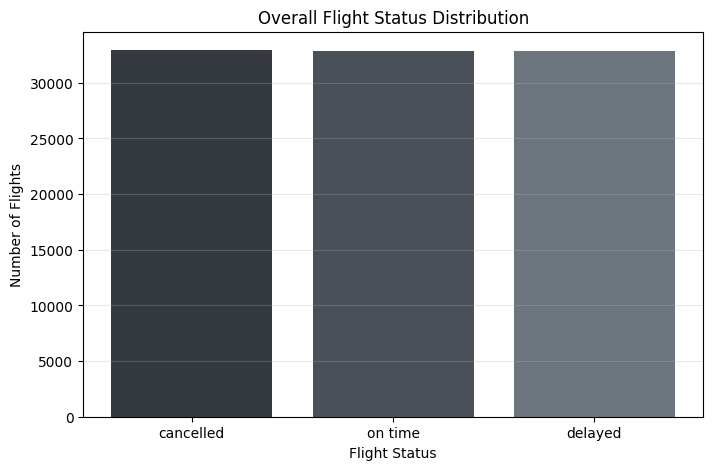

In [9]:
plt.figure(figsize=(8,5))

plt.bar(
    flight_dist.index,
    flight_dist.values,
    color=["#343a40", "#495057", "#6c757d"]
)

plt.title("Overall Flight Status Distribution")
plt.xlabel("Flight Status")
plt.ylabel("Number of Flights")
plt.grid(axis='y', alpha=0.3)

plt.show()

## 7. Continental Performance Analysis

In [10]:
# This code shows how flight statuses are distributed across each continent, in percentage form.
continent_status = pd.crosstab(
    df['Continents'],
    df['Flight Status'],
    normalize='index'
) * 100

continent_status

Flight Status,cancelled,delayed,on time
Continents,,,
africa,33.155032,33.127833,33.717135
asia,33.454955,33.052530,33.492515
europe,33.198216,33.871099,32.930685
north america,33.381201,33.390566,33.228233
oceania,33.311698,33.419876,33.268426
south america,33.989550,32.739317,33.271133


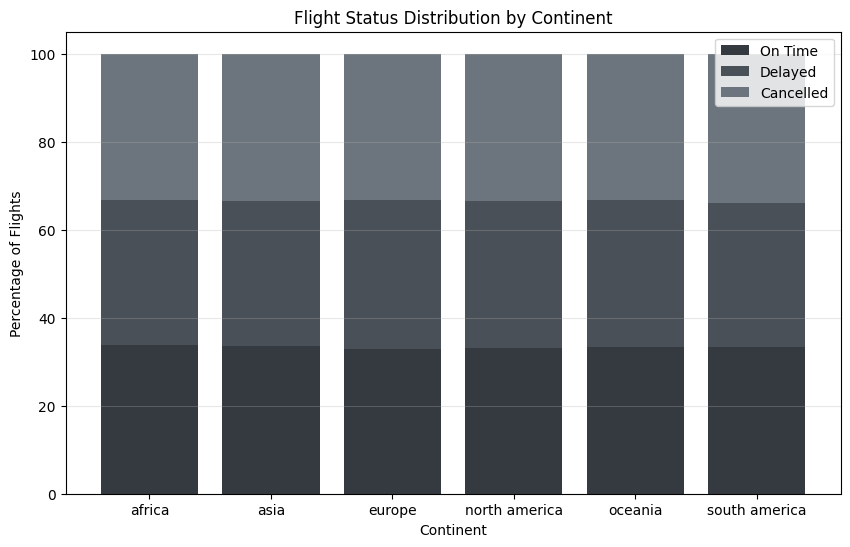

In [11]:
plt.figure(figsize=(10,6))

plt.bar(
    continent_status.index,
    continent_status['on time'],
    label='On Time',
    color="#343a40"
)

plt.bar(
    continent_status.index,
    continent_status['delayed'],
    bottom=continent_status['on time'],
    label='Delayed',
    color="#495057"
)

plt.bar(
    continent_status.index,
    continent_status['cancelled'],
    bottom=continent_status['on time'] + continent_status['delayed'],
    label='Cancelled',
    color="#6c757d"
)

plt.title("Flight Status Distribution by Continent")
plt.xlabel("Continent")
plt.ylabel("Percentage of Flights")
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

## 8. Country-Level Risk Analysis

In [12]:
# This code identifies the countries with the highest flight risk based on delays and cancellations.
country_risk = df.groupby('Country Name')[['delay_flag','cancel_flag']].mean() * 100
country_risk.sort_values(by='delay_flag', ascending=False).head(10)

,delay_flag,cancel_flag
Country Name,,
palau,60.000000,40.000000
guernsey,56.250000,25.000000
saint lucia,55.555556,16.666667
sint maarten (dutch part),55.555556,33.333333
mayotte,53.846154,15.384615
samoa,51.162791,25.581395
isle of man,50.000000,41.666667
"palestine, state of",48.387097,22.580645
wallis and futuna,47.058824,23.529412


## 9. Airport Performance Analysis

In [13]:
# This code measures how well each airport is performing based on flight outcomes.
airport_perf = pd.crosstab(
    df['Airport Name'],
    df['Flight Status'],
    normalize='index'
) * 100

airport_perf.fillna(0).head()

Flight Status,cancelled,delayed,on time
Airport Name,,,
28 de noviembre airport,25.000000,31.250000,43.750000
9 de maio - teixeira de freitas airport,20.000000,40.000000,40.000000
a coruña airport,45.454545,18.181818,36.363636
a l mangham jr. regional airport,27.272727,27.272727,45.454545
a p hill aaf (fort a p hill) airport,33.333333,25.000000,41.666667


## 10. Passenger Demographic Impact

In [14]:
# This code shows how flight outcomes differ by passenger age group, in percentages.
pd.crosstab(
    df['age_group'],
    df['Flight Status'],
    normalize='index'
) * 100

Flight Status,cancelled,delayed,on time
age_group,,,
teen,33.335030,33.258679,33.406291
young_adult,33.769949,32.866606,33.363445
adult,33.220900,33.331289,33.447811
senior,33.381494,33.405575,33.212931
elderly,33.397412,33.403515,33.199072


#### Gender vs Flight Status

In [15]:
# This code compares flight outcomes across genders, using percentages.
pd.crosstab(
    df['Gender'],
    df['Flight Status'],
    normalize='index'
) * 100

Flight Status,cancelled,delayed,on time
Gender,,,
female,33.561127,33.232696,33.206177
male,33.247308,33.348119,33.404573


## 11. Time-Based (Seasonality) Analysis

In [16]:
# This code analyzes how flight performance changes month by month.
df['month'] = df['Departure Date'].dt.month
monthly_status = pd.crosstab(
    df['month'],
    df['Flight Status'],
    normalize='index'
) * 100

monthly_status

Flight Status,cancelled,delayed,on time
month,,,
1,32.640209,34.077947,33.281844
2,33.516268,33.150399,33.333333
3,32.926106,33.139604,33.934290
4,33.232818,34.112326,32.654856
5,33.498117,33.580508,32.921375
6,33.907480,32.947835,33.144685
7,33.132174,32.871849,33.995977
8,33.520599,32.830056,33.649345
9,33.942815,33.415143,32.642042


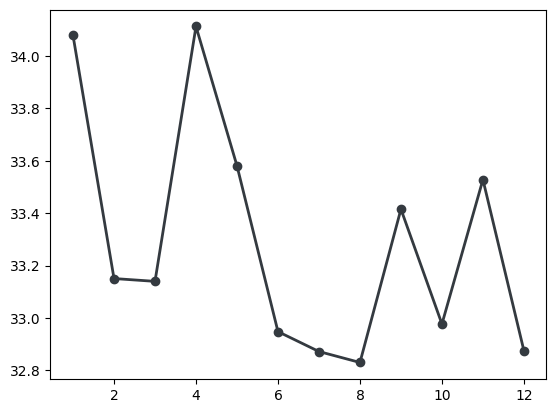

In [17]:
plt.plot(
    monthly_status.index,
    monthly_status['delayed'],
    marker='o',
    linewidth=2,
    color="#343a40"
)

## 12. Route-Level Risk Analysis

In [18]:
# This code finds the riskiest flight routes based on delays and cancellations.
route_risk = df.groupby(
    ['Airport Name','Arrival Airport']
)[['delay_flag','cancel_flag']].mean() * 100

route_risk.sort_values(by='delay_flag', ascending=False).head(10)

,,delay_flag,cancel_flag
Airport Name,Arrival Airport,,
kasba lake airport,YDU,100.0,0.0
batna airport,BLJ,100.0,0.0
robin hood doncaster sheffield airport,DSA,100.0,0.0
caquetania airport,CQT,100.0,0.0
miyanmin airport,MPX,100.0,0.0
st clair county airport,PLR,100.0,0.0
caia airport,CMZ,100.0,0.0
jorge wilsterman international airport,CBB,100.0,0.0
amasya merzifon airport,MZH,100.0,0.0


## 13. Passenger Vulnerability (Senior Impact)

In [19]:
# This code focuses only on senior and elderly passengers to see how their flights perform.
pd.crosstab(
    df[df['age_group'].isin(['senior','elderly'])]['age_group'],
    df[df['age_group'].isin(['senior','elderly'])]['Flight Status'],
    normalize='index'
) * 100

Flight Status,cancelled,delayed,on time
age_group,,,
senior,33.381494,33.405575,33.212931
elderly,33.397412,33.403515,33.199072


## 14. Extreme Risk Zone Detection

In [20]:
# This code identifies airports with the highest overall disruption risk.
df['extreme_risk_flag'] = np.where(
    (df['delay_flag']==1) | (df['cancel_flag']==1),
    1, 0
)

extreme_airports = df.groupby('Airport Name')['extreme_risk_flag'].mean() * 100
extreme_airports.sort_values(ascending=False).head(10)

Airport Name
abakan airport                           100.0
roseberth airport                        100.0
southwest oregon regional airport        100.0
shannon airport                          100.0
juan santamaria international airport    100.0
awassa airport                           100.0
rafael cabrera airport                   100.0
mahendranagar airport                    100.0
spencer municipal airport                100.0
batna airport                            100.0
Name: extreme_risk_flag, dtype: float64

## 15. Composite Airline Risk Index

In [21]:
# This code creates a single risk score and compares it across continents.
df['composite_risk_index'] = (
    df['delay_flag']*2 +
    df['cancel_flag']*5 +
    df['age_group'].isin(['senior','elderly']).astype(int)
)

df.groupby('Continents')['composite_risk_index'].mean()

Continents
africa           2.820762
asia             2.835167
europe           2.832996
north america    2.839790
oceania          2.833261
south america    2.855477
Name: composite_risk_index, dtype: float64

## 16. Risk vs Volume Paradox

In [22]:
# This code compares airport traffic volume with disruption risk.
airport_volume = df['Airport Name'].value_counts()

risk_volume = pd.DataFrame({
    'flight_volume': airport_volume,
    'risk_percent': extreme_airports
}).dropna()

risk_volume.sort_values(by='risk_percent', ascending=False).head(10)

,flight_volume,risk_percent
Airport Name,,
abakan airport,3,100.0
roseberth airport,6,100.0
southwest oregon regional airport,5,100.0
shannon airport,6,100.0
juan santamaria international airport,5,100.0
awassa airport,8,100.0
rafael cabrera airport,10,100.0
mahendranagar airport,3,100.0
spencer municipal airport,8,100.0


## 17. DASHBOARD

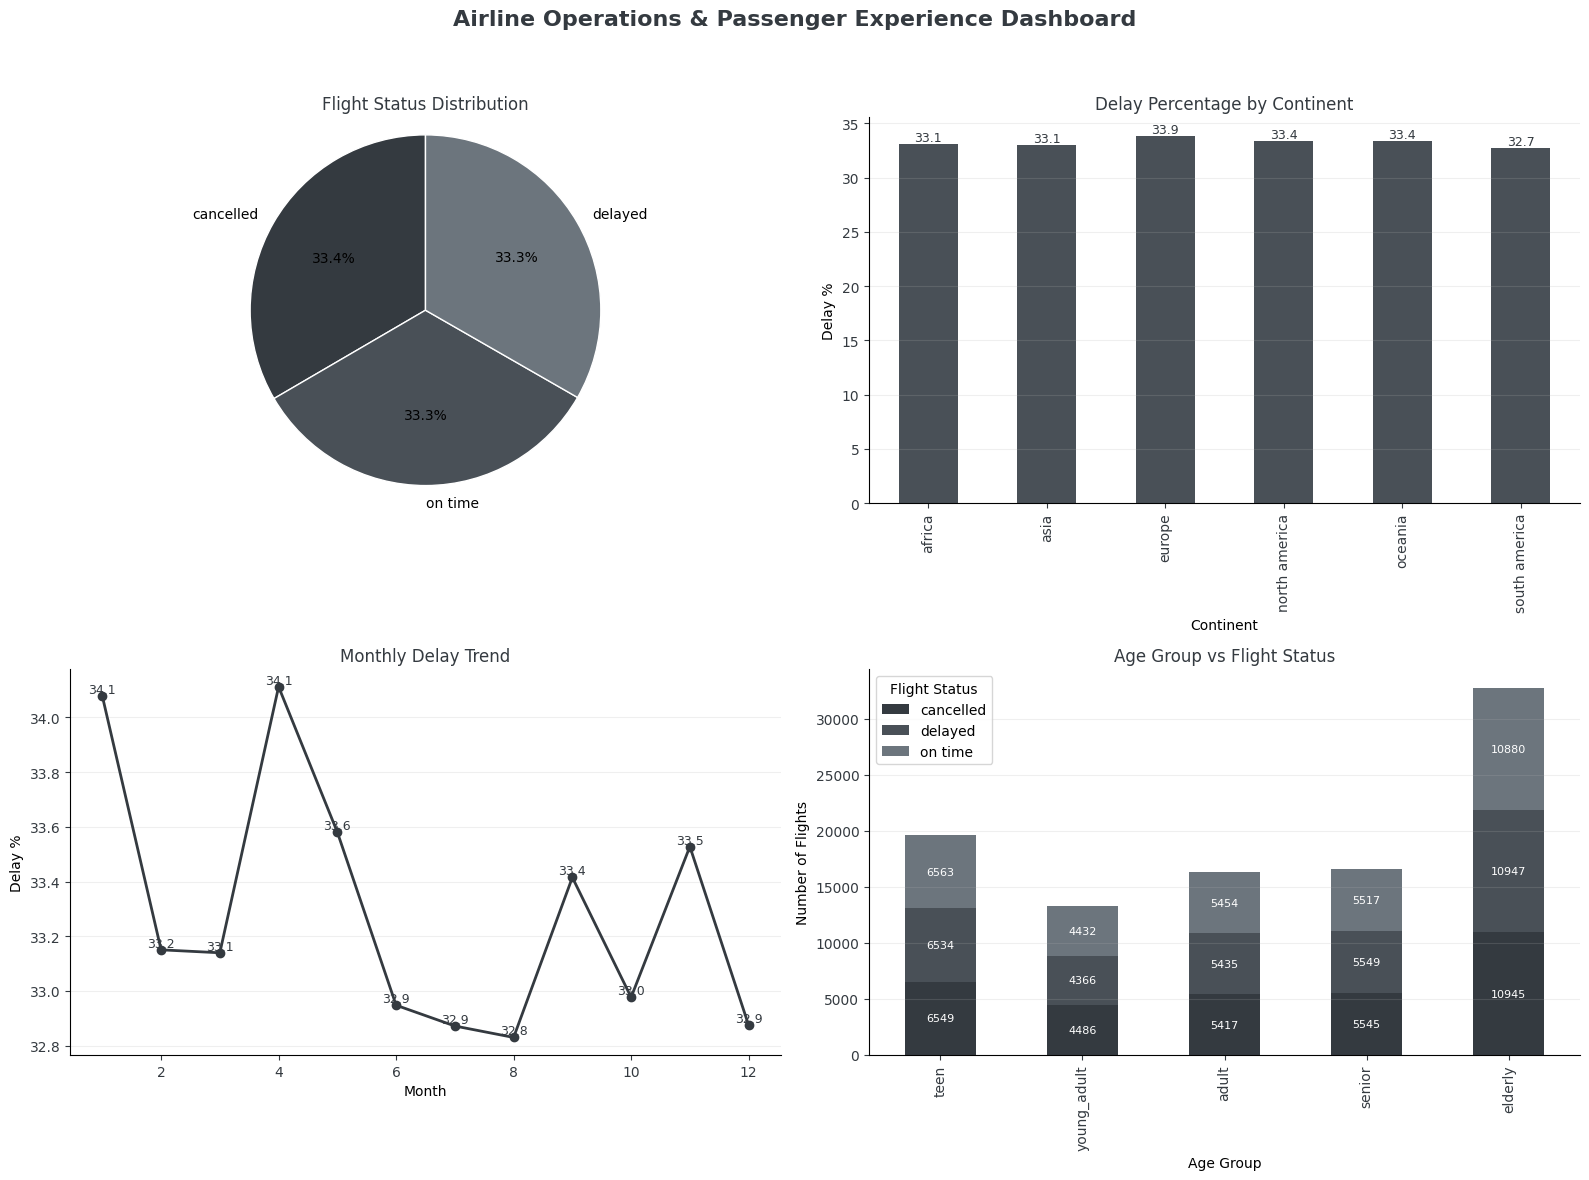

In [23]:
# =========================
# Color Theme
# =========================
DARK = "#343a40"
MID = "#495057"
LIGHT = "#6c757d"

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

fig.suptitle(
    "Airline Operations & Passenger Experience Dashboard",
    fontsize=16,
    fontweight='bold',
    color=DARK
)

# =========================
# Plot 1: Flight Status Distribution (Pie)
# =========================
axes[0,0].pie(
    flight_dist.values,
    labels=flight_dist.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=[DARK, MID, LIGHT],
    wedgeprops={'edgecolor': 'white'}
)
axes[0,0].set_title("Flight Status Distribution", color=DARK)
axes[0,0].axis('equal')

# =========================
# Plot 2: Delay % by Continent
# =========================
continent_status['delayed'].plot(
    kind='bar',
    ax=axes[0,1],
    color=MID
)
axes[0,1].set_title("Delay Percentage by Continent", color=DARK)
axes[0,1].set_xlabel("Continent")
axes[0,1].set_ylabel("Delay %")

for bar in axes[0,1].patches:
    axes[0,1].text(
        bar.get_x() + bar.get_width()/2,
        bar.get_height(),
        f"{bar.get_height():.1f}",
        ha='center',
        va='bottom',
        fontsize=9,
        color=DARK
    )

# =========================
# Plot 3: Monthly Delay Trend
# =========================
axes[1,0].plot(
    monthly_status.index,
    monthly_status['delayed'],
    marker='o',
    linewidth=2,
    color=DARK
)
axes[1,0].set_title("Monthly Delay Trend", color=DARK)
axes[1,0].set_xlabel("Month")
axes[1,0].set_ylabel("Delay %")

for x, y in zip(monthly_status.index, monthly_status['delayed']):
    axes[1,0].text(
        x,
        y,
        f"{y:.1f}",
        ha='center',
        va='bottom',
        fontsize=9,
        color=DARK
    )

# =========================
# Plot 4: Age Group vs Flight Status
# =========================
pd.crosstab(
    df['age_group'],
    df['Flight Status']
).plot(
    kind='bar',
    stacked=True,
    ax=axes[1,1],
    color=[DARK, MID, LIGHT]
)
axes[1,1].set_title("Age Group vs Flight Status", color=DARK)
axes[1,1].set_xlabel("Age Group")
axes[1,1].set_ylabel("Number of Flights")

for container in axes[1,1].containers:
    axes[1,1].bar_label(container, label_type='center', fontsize=8, color='white')

# =========================
# Final formatting adjustments
# =========================

for ax in axes.flat:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(axis='y', alpha=0.2)
    ax.tick_params(colors=DARK)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [24]:
#To Save The Dashboard Image
fig.tight_layout(rect=[0, 0, 1, 0.95])
fig.savefig(
    "Airline_Operations_Passenger_Experience_Dashboard.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()

## Key Insights & Business Recommendations

### 🔍 Key Insights

- A noticeable proportion of flights experience delays, indicating room for improvement in overall airline punctuality.
- Delay percentages vary significantly across continents, suggesting that regional infrastructure and operational factors influence performance.
- Monthly trend analysis highlights seasonal fluctuations in delay rates, with certain months consistently showing higher disruption levels.
- Seasonal peaks reveal periods of operational stress that require proactive planning.
- Passenger impact analysis shows that flight disruptions are not evenly distributed across age groups, with some segments being more affected than others.
- The dashboard demonstrates that overall performance, regional behavior, seasonality, and passenger demographics are closely interconnected.

### ✅ Recommendations

Based on the findings from this analysis, the following recommendations are proposed:

- Prioritize operational improvements in regions with consistently higher delay percentages.
- Implement additional staffing, scheduling buffers, and contingency planning during high-delay months.
- Strengthen passenger communication and assistance strategies for age groups more affected by disruptions.
- Use operational dashboards regularly to monitor performance trends and support timely decision-making.
- Conduct periodic performance reviews using historical delay patterns to anticipate operational challenges.
- Enhance future analyses by incorporating delay duration, root causes, or cost-related data when available.